# Comparaison de l'estimation LexImpact avec la publication du Sénat

In [17]:
from typing import List

import pandas as pd
import plotly.graph_objects as go

from leximpact_socio_fisca_simu_etat.quantiles import SimulationError, quantile_to_df
from leximpact_socio_fisca_simu_etat.schema import (
    AllSimulationResult,
    OneSimulationResult,
    ReformeSocioFiscale,
)
from leximpact_socio_fisca_simu_etat.simu_budget_survey_scenario import (
    compute_all_simulation,
)

Répartition de l'impôt sur le revenu selon le décile de revenus en 2021 d'après le [rapport du Sénat](http://www.senat.fr/rap/l22-115-21/l22-115-212.html) :

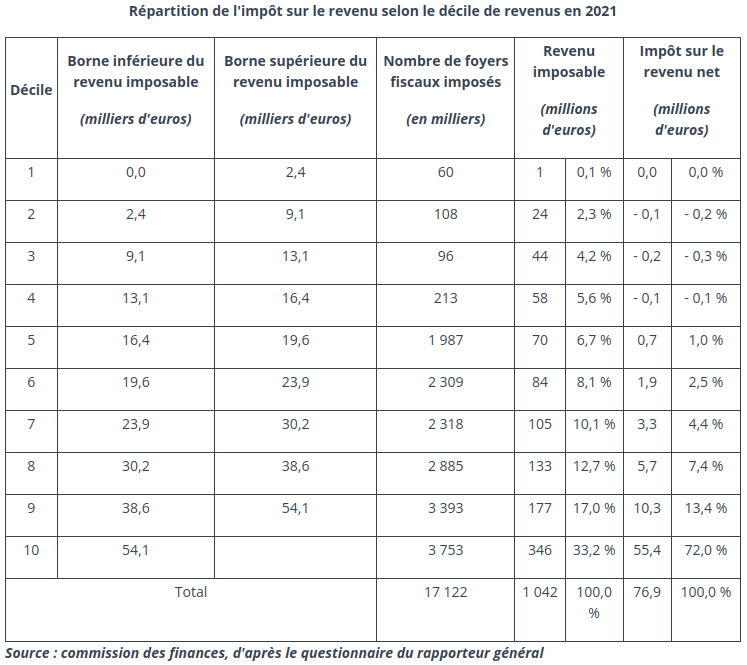

In [43]:
senat_2021 = {
    "decile": [i + 1 for i in range(10)],
    "rfr_min": [
        int(n * 1000) for n in [0.0, 2.4, 9.1, 13.1, 16.4, 19.6, 23.9, 30.2, 38.6, 54.1]
    ],
    "rfr_max": [
        int(n * 1000)
        for n in [2.4, 9.1, 13.1, 16.4, 19.6, 23.9, 30.2, 38.6, 54.1, 1_000.0]
    ],
    "nb_imposable": [
        int(n * 1000) for n in [60, 108, 96, 213, 1987, 2309, 2318, 2885, 3393, 3753]
    ],
    "rfr": [int(n * 1e9) for n in [1, 24, 44, 58, 70, 84, 105, 133, 177, 346]],
    "irpp": [
        int(n * 1e9) for n in [0.0, -0.1, -0.2, -0.1, 0.7, 1.9, 3.3, 5.7, 10.3, 55.4]
    ],
}

df_senat = pd.DataFrame(senat_2021)
df_senat

decile  rfr_min  rfr_max  nb_imposable           rfr         irpp
0       1        0     2400         60000    1000000000            0
1       2     2400     9100        108000   24000000000   -100000000
2       3     9100    13100         96000   44000000000   -200000000
3       4    13100    16400        213000   58000000000   -100000000
4       5    16400    19600       1987000   70000000000    700000000
5       6    19600    23900       2309000   84000000000   1900000000
6       7    23900    30200       2318000  105000000000   3300000000
7       8    30200    38600       2885000  133000000000   5700000000
8       9    38600    54100       3393000  177000000000  10300000000
9      10    54100  1000000       3753000  346000000000  55400000000

In [44]:
%%time
# "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.05
reform_quantile_rfr = ReformeSocioFiscale(
    base=2021,
    amendement={
        "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.05
    },
    output_variables=["rfr", "irpp"],
    quantile_nb=10,
    quantile_base_variable=["rfr"],
    quantile_compare_variables=[
        "irpp",
    ],
)

resultat_quantile_rfr = compute_all_simulation(reform_quantile_rfr)

[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:19] reformParameters.amendement : {'prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux': 0.05}
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:19] compute_reform - reformParameters : base=2021 plf=None amendement={'prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux': 0.05} output_variables=['rfr', 'irpp'] quantile_nb=10 quantile_entity='foyer_fiscal' quantile_base_variable=['rfr'] quantile_compare_variables=['irpp']
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:19] compute_reform - annee_de_calcul : 2021
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:19] Il y a un amendement
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:19] create_survey_scenario - start


LeximpactErfsSurveyScenario : Using /home/jupyter-benoit/leximpact-socio-fiscal-simu-etat/deploy as config_dirpath
years_available=[2019] vs years=[2019, 2020, 2021]
Données du scénario : 
 {'input_data_table_by_entity_by_period': {2019: {'individu': 'individu_2019', 'famille': 'famille_2019', 'foyer_fiscal': 'foyer_fiscal_2019', 'menage': 'menage_2019', 'faoyer_fiscal': 'faoyer_fiscal_2019'}, 2020: {'individu': 'individu_2019', 'famille': 'famille_2019', 'foyer_fiscal': 'foyer_fiscal_2019', 'menage': 'menage_2019', 'faoyer_fiscal': 'faoyer_fiscal_2019'}, 2021: {'individu': 'individu_2019', 'famille': 'famille_2019', 'foyer_fiscal': 'foyer_fiscal_2019', 'menage': 'menage_2019', 'faoyer_fiscal': 'faoyer_fiscal_2019'}}, 'survey': 'leximpact_2019'}
baseline
plf
amendement


[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:28] create_survey_scenario - stop
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:44] Calcul de variable='rfr'
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:44] calculate_add : La somme de rfr pour 2021 est 1,065,095,032,569 pour les amendement_tax_benefit_system.get_variable(variable).entity.key='foyer_fiscal'
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:44] OpenFisca a retourné des foyer_fiscal pour rfr en 2021.
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:44] Calcul de variable='irpp'
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:44] calculate_add : La somme de irpp pour 2021 est -76,437,764,285 pour les amendement_tax_benefit_system.get_variable(variable).entity.key='foyer_fiscal'
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:44] OpenFisca a retourné des foyer_fiscal pour irpp en 2021.
[leximpact_socio-fisca-simu-etat DEBUG @ 15:06:44] compute_reform - Temps de traitement pour une simulation 25.299537300132215 secondes.
[leximpac

CPU times: user 28.8 s, sys: 11.7 s, total: 40.5 s
Wall time: 25.3 s


In [51]:
df = quantile_to_df(resultat_quantile_rfr, "irpp_sum")
df.quantile_num = df.quantile_num.astype(int)
df_diff = df.merge(
    df_senat, left_on="quantile_num", right_on="decile", suffixes=("", "_senat")
)
df_diff.irpp = df_diff.irpp * -1

In [57]:
df_diff["ecart_frontieres_rfr"] = (
    df_diff.rfr_min - df_diff.rfr_min_senat
) / df_diff.rfr_min
df_diff["ecart_irpp"] = df_diff.irpp - df_diff.irpp_senat

In [53]:
df_diff[["quantile_num", "ecart_frontieres_rfr"]]

quantile_num  ecart_frontieres_rfr
0             1                   NaN
1             2              0.563636
2             3              0.172727
3             4              0.181250
4             5              0.180000
5             6              0.216000
6             7              0.229032
7             8              0.205263
8             9              0.178723
9            10              0.141270

In [54]:
def plot_bar(
    df: pd.DataFrame(),
    x: str,
    y: List,
    y_labels: List,
    title: str,
    xlabel: str,
    ylabel: str,
):
    data = []
    if isinstance(y, str):
        y = [y]
        y_labels = [y_labels]
    for one_y in zip(y, y_labels):
        data.append(go.Bar(x=df[x], y=df[one_y[0]], text=df[one_y[0]], name=one_y[1]))
    # Create the layout
    layout = go.Layout(
        title=title,
        xaxis={"tickmode": "linear", "title": xlabel},
        yaxis={"title": ylabel},
    )
    fig = go.Figure(data=data, layout=layout)
    # Change the bar mode
    fig.update_layout(barmode="group")
    # fig = px.bar(df, x=x, y=y, title=title)
    # _ = ax.set_title(
    #     title,
    #     size=20,
    # )
    # _ = ax.set_xlabel(xlabel)
    # _ = ax.set_ylabel(ylabel)
    # _ = ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f} €"))
    # _ = ax.set_xticklabels(
    #     [f"{float(l.get_text()):,.0f} €" for l in ax.get_xticklabels()],
    #     rotation=90,
    #     size=15,
    # )
    fig.show("iframe")

In [55]:
plot_bar(
    df_diff,
    x="quantile_num",
    y=["rfr_min", "rfr_min_senat"],
    y_labels=["LexImpact", "Sénat"],
    title="Comparaison de la frontière de RFR des déciles",
    xlabel="Déciles",
    ylabel="€",
)

In [56]:
plot_bar(
    df_diff,
    x="quantile_num",
    y=["irpp", "irpp_senat"],
    y_labels=["LexImpact", "Sénat"],
    title="Comparaison de l'IRPP par décile",
    xlabel="Déciles",
    ylabel="€",
)

In [58]:
plot_bar(
    df_diff,
    x="quantile_num",
    y=["ecart_irpp"],
    y_labels=["LexImpact - Sénat"],
    title="Comparaison de l'IRPP par décile",
    xlabel="Déciles",
    ylabel="€",
)